In [225]:
import numpy as np
import pandas as pd
import networkx as nx
from sympy.utilities.iterables import multiset_permutations
import matplotlib.pyplot as plt
from pygmo import non_dominated_front_2d as nd2


In [226]:
rl = 10 # route length

In [227]:
df = pd.read_csv('bicycle_network.csv')
df['score'] = np.sum(df[['scenic_beauty', 'roughness', 'safety', 'slope']], axis=1)
df = df[['node1', 'node2', 'distance', 'score']]
df = df.loc[(df.node1 < rl) & (df.node2 < rl)]
df = df.reset_index(drop=True)


In [228]:
g = nx.Graph()
for node1 in range(rl):
    for node2 in range(rl):
        if node1 == node2:
            continue
        g.add_edge(node1,
                   node2,
                   distance=df.loc[(df.node1 == node1) & (df.node2 == node2), 'distance'].values[0],
                   scenic_score=df.loc[(df.node1 == node1) & (df.node2 == node2), 'score'].values[0])

In [229]:
def evaluate(g, route):
    scenic_score = 0
    distance = 0
    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i+1]
        scenic_score += g.get_edge_data(route[i], route[i+1])['scenic_score']
        distance += g.get_edge_data(route[i], route[i+1])['distance']
    return distance, scenic_score


In [230]:
results = []
for route in multiset_permutations(np.arange(rl)):
    results.append(evaluate(g, route))
results = np.array(results)

results2 = results.copy()
results2[:, 1] = -results2[:, 1]
idx = nd2(results2)
pareto_front = results[idx]


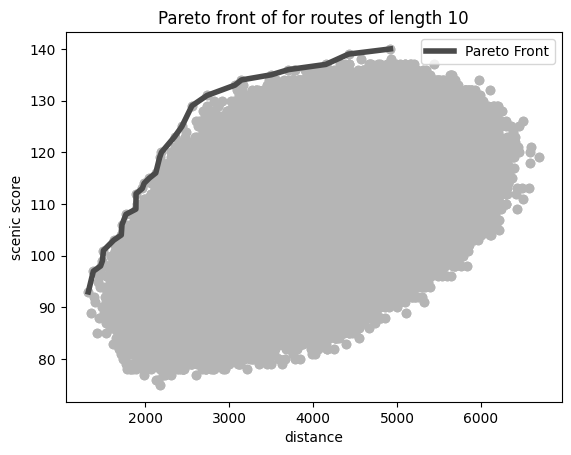

In [237]:
fig, ax = plt.subplots()

ax.scatter(results[:, 0], results[:, 1], c='#b5b5b5')
ax.plot(pareto_front[:, 0], pareto_front[:, 1], label='Pareto Front', c='#4a4a4a', linewidth=4)
ax.set_xlabel('distance')
ax.set_ylabel('scenic score')
ax.legend()
ax.set_title(f'Pareto front of for routes of length {rl}')
plt.show()